In [2]:
#!pip install git+https://github.com/aimclub/FEDOT.git

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [6]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp']['value'].to_numpy()
ts_real_traffic = ts_tabular[ts_tabular['label']=='traffic_volume'].to_numpy()
ts_real_oil = ts_tabular[ts_tabular['label']=='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)']['value'].to_numpy()
#ts_tabular.label.value_counts()

FileNotFoundError: ignored

In [55]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans


def s7(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1+r*np.sin(np.pi*r/48)/np.log(r+2)
    noise_coeff = np.log(r+1)
    noise = np.random.normal(loc=0,scale = noise_coeff*noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

In [67]:
horizon = 100
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 2000
end = 3000
series = 7

if series == 'oil':
  init_series = ts_real_oil
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'traffic':
  init_series = ts_real_traffic
  ts = init_series[start:end]
  trend = None
  ts_test = init_series[end:end+horizon]
  trend_test = None

if series == 'temp':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]  
    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
  
if series ==5:
    noise = 1
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]   

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]



if series ==7:
    noise = 1
    init_series = s7(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
 
idx = np.array( range(len(np.array(ts))) )
train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=5,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

In [68]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-12-01 17:05:14,733 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 17:05:14,741 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:05:14,750 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-12-01 17:05:14,754 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:05:14,757 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-12-01 17:05:14,761 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-12-01 17:05:14,966 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 17:05:15,302 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:05:15,308 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 17:05:15,311 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:05:15,316 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 17:05:15,322 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-12-01 17:05:15,330 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-12-01 17:05:15,340 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.6 sec.


2022-12-01 17:05:15,347 - ApiComposer - Initial pipeline was fitted in 0.6 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['scaling', 'locf', 'dtreg', 'smoothing', 'diff_filter', 'ar', 'arima', 'glm', 'sgdr', 'stl_arima', 'lagged', 'ridge', 'lasso', 'normalization', 'sparse_lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'adareg', 'linear', 'ets', 'cut', 'fast_ica', 'pca'].


2022-12-01 17:05:15,382 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 5 min. Set of candidate models: ['scaling', 'locf', 'dtreg', 'smoothing', 'diff_filter', 'ar', 'arima', 'glm', 'sgdr', 'stl_arima', 'lagged', 'ridge', 'lasso', 'normalization', 'sparse_lagged', 'polyfit', 'ts_naive_average', 'gaussian_filter', 'adareg', 'linear', 'ets', 'cut', 'fast_ica', 'pca'].


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-12-01 17:05:15,393 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-12-01 17:05:15,399 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 17:05:15,410 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-12-01 17:05:23,986 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=208.047 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 17:05:24,003 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=208.047 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 17:05:25,555 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-12-01 17:05:56,218 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=173.552 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 17:05:56,224 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=173.552 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - Next population size: 21; max graph depth: 5


2022-12-01 17:05:56,229 - EvoGraphOptimizer - Next population size: 21; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 17:05:56,887 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-12-01 17:06:19,464 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=173.552 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 17:06:19,472 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=173.552 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 17:06:19,481 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.1 min


2022-12-01 17:06:19,487 - EvoGraphOptimizer - spent time: 1.1 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-12-01 17:06:19,492 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-12-01 17:06:20,089 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-12-01 17:06:35,228 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=171.116 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 17:06:35,238 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=171.116 ComplexityMetricsEnum.node_num=0.400>']


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-12-01 17:06:35,242 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [01:19<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 1.331 min


2022-12-01 17:06:35,247 - OptimisationTimer - Composition time: 1.331 min


INFO:root:EvoGraphOptimizer - Generation num: 5


2022-12-01 17:06:35,251 - EvoGraphOptimizer - Generation num: 5


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=171.116 ComplexityMetricsEnum.node_num=0.400>']


2022-12-01 17:06:35,254 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: ['<get_value=171.116 ComplexityMetricsEnum.node_num=0.400>']


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-12-01 17:06:35,257 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.3 min


2022-12-01 17:06:35,260 - EvoGraphOptimizer - spent time: 1.3 min


INFO:root:GPComposer - GP composition finished


2022-12-01 17:06:35,265 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-12-01 17:06:35,563 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-12-01 17:06:35,995 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10.94701125541765}


2022-12-01 17:06:36,009 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10.94701125541765}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 17:06:36,019 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:06:36,029 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-12-01 17:06:36,037 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-12-01 17:06:36,043 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-12-01 17:06:36,052 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: ts_naive_average


2022-12-01 17:06:36,063 - PrimaryNode - Predict in primary node by operation: ts_naive_average


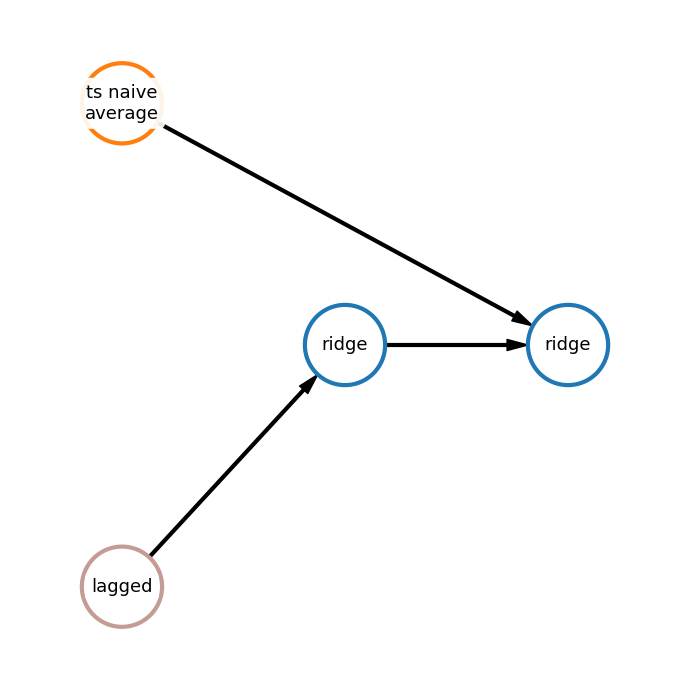

In [69]:
pipeline.show()

In [70]:
#!pip install matplotlib==3.1.3

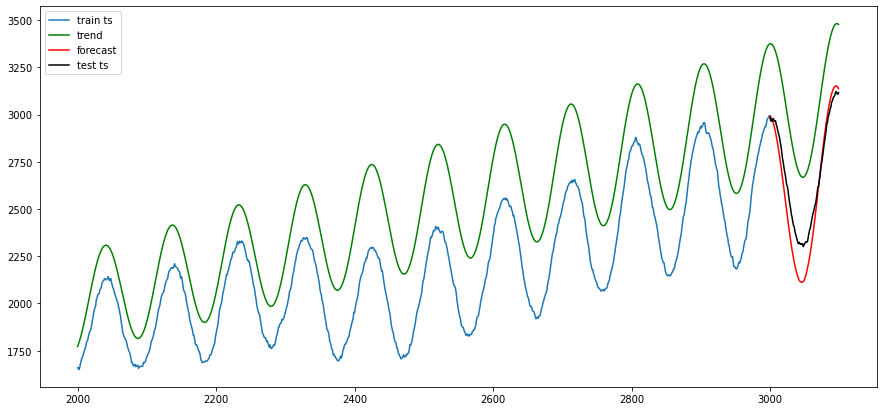

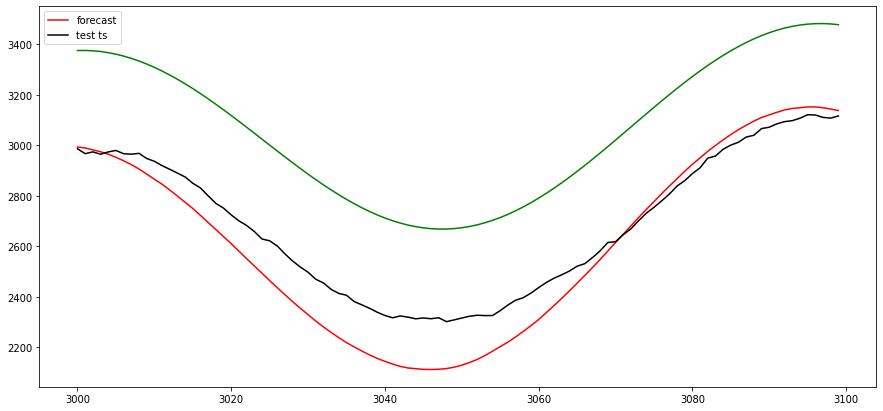

In [71]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [72]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [73]:
#importing for tuning

from fedot.core.pipelines.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 17:06:37,053 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-12-01 17:06:37,060 - DataSourceSplitter - Hold out validation is applied.


In [74]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [75]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-2]:
         fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))
    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-2]: #[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [76]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

Fitting pipeline №1


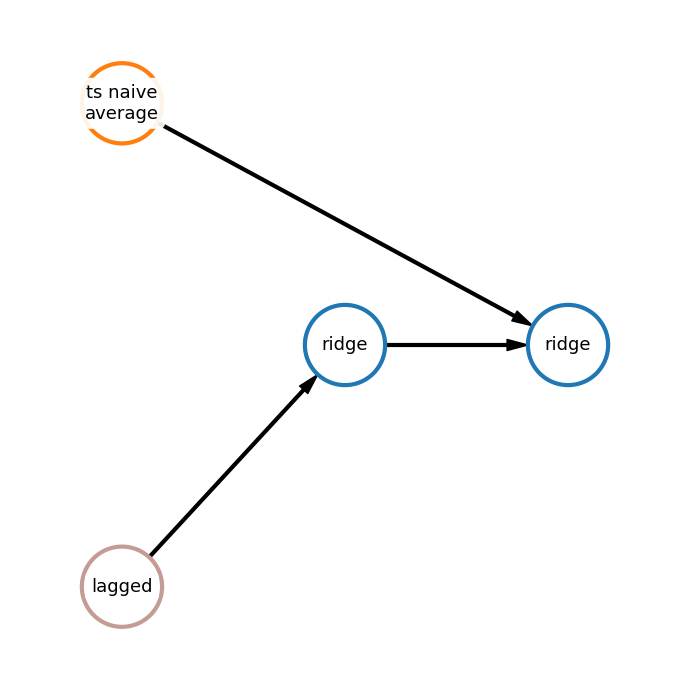

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:06:37,522 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 204.104


2022-12-01 17:06:37,925 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 204.104
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002497 seconds


2022-12-01 17:06:37,940 - build_posterior_wrapper took 0.002497 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:06:37,946 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003139 seconds


2022-12-01 17:06:38,402 - build_posterior_wrapper took 0.003139 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 204.105161


2022-12-01 17:06:38,418 - TPE using 1/1 trials with best loss 204.105161
 20%|██        | 2/10 [00:01<00:10,  1.30s/trial, best loss: 204.10516052782307]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004533 seconds


2022-12-01 17:06:39,702 - build_posterior_wrapper took 0.004533 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 204.105161


2022-12-01 17:06:39,710 - TPE using 2/2 trials with best loss 204.105161
 30%|███       | 3/10 [00:02<00:08,  1.26s/trial, best loss: 204.10516052782307]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006572 seconds


2022-12-01 17:06:40,948 - build_posterior_wrapper took 0.006572 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 204.105161


2022-12-01 17:06:40,955 - TPE using 3/3 trials with best loss 204.105161
 40%|████      | 4/10 [00:03<00:05,  1.07trial/s, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006406 seconds


2022-12-01 17:06:41,494 - build_posterior_wrapper took 0.006406 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 176.220777


2022-12-01 17:06:41,502 - TPE using 4/4 trials with best loss 176.220777
 50%|█████     | 5/10 [00:03<00:04,  1.24trial/s, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002259 seconds


2022-12-01 17:06:42,089 - build_posterior_wrapper took 0.002259 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 176.220777


2022-12-01 17:06:42,105 - TPE using 5/5 trials with best loss 176.220777
 60%|██████    | 6/10 [00:04<00:02,  1.36trial/s, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002875 seconds


2022-12-01 17:06:42,705 - build_posterior_wrapper took 0.002875 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 176.220777


2022-12-01 17:06:42,716 - TPE using 6/6 trials with best loss 176.220777
 70%|███████   | 7/10 [00:05<00:02,  1.33trial/s, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006022 seconds


2022-12-01 17:06:43,502 - build_posterior_wrapper took 0.006022 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 176.220777


2022-12-01 17:06:43,509 - TPE using 7/7 trials with best loss 176.220777
 80%|████████  | 8/10 [00:07<00:02,  1.22s/trial, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002383 seconds


2022-12-01 17:06:45,682 - build_posterior_wrapper took 0.002383 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 176.220777


2022-12-01 17:06:45,699 - TPE using 8/8 trials with best loss 176.220777
 90%|█████████ | 9/10 [00:08<00:01,  1.19s/trial, best loss: 176.22077736385916]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002337 seconds


2022-12-01 17:06:46,792 - build_posterior_wrapper took 0.002337 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 176.220777


2022-12-01 17:06:46,803 - TPE using 9/9 trials with best loss 176.220777
100%|██████████| 10/10 [00:09<00:00,  1.08s/trial, best loss: 176.22077736385916]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:06:48,683 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 176.221 equal or better than initial (+ 5% deviation) 214.309


2022-12-01 17:06:48,691 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 176.221 equal or better than initial (+ 5% deviation) 214.309


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.3157348706216565}
ts_naive_average - {'part_for_averaging': 0.2270851993612965}
ridge - {'alpha': 7.329876863380855}
lagged - {'window_size': 48}


2022-12-01 17:06:48,700 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.3157348706216565}
ts_naive_average - {'part_for_averaging': 0.2270851993612965}
ridge - {'alpha': 7.329876863380855}
lagged - {'window_size': 48}


CRITICAL:root:PipelineTuner - Final metric: 176.221


2022-12-01 17:06:48,709 - PipelineTuner - Final metric: 176.221


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:06:49,232 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.3157348706216565}
ts_naive_average - {'part_for_averaging': 0.2270851993612965}
ridge - {'alpha': 7.329876863380855}
lagged - {'window_size': 48} 
Initial metric: 19.580


2022-12-01 17:06:49,764 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 0.3157348706216565}
ts_naive_average - {'part_for_averaging': 0.2270851993612965}
ridge - {'alpha': 7.329876863380855}
lagged - {'window_size': 48} 
Initial metric: 19.580
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003793 seconds


2022-12-01 17:06:49,791 - build_posterior_wrapper took 0.003793 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:06:49,799 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003936 seconds


2022-12-01 17:06:50,331 - build_posterior_wrapper took 0.003936 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 19.580086


2022-12-01 17:06:50,341 - TPE using 1/1 trials with best loss 19.580086
 20%|██        | 2/10 [00:00<00:04,  1.92trial/s, best loss: 19.529081233640603]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003949 seconds


2022-12-01 17:06:50,858 - build_posterior_wrapper took 0.003949 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 19.529081


2022-12-01 17:06:50,866 - TPE using 2/2 trials with best loss 19.529081
 30%|███       | 3/10 [00:01<00:04,  1.49trial/s, best loss: 19.529081233640603]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002306 seconds


2022-12-01 17:06:51,637 - build_posterior_wrapper took 0.002306 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 19.529081


2022-12-01 17:06:51,644 - TPE using 3/3 trials with best loss 19.529081
 40%|████      | 4/10 [00:03<00:08,  1.48s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003473 seconds


2022-12-01 17:06:54,072 - build_posterior_wrapper took 0.003473 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 19.330400


2022-12-01 17:06:54,077 - TPE using 4/4 trials with best loss 19.330400
 50%|█████     | 5/10 [00:04<00:06,  1.25s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002455 seconds


2022-12-01 17:06:54,989 - build_posterior_wrapper took 0.002455 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 19.330400


2022-12-01 17:06:55,003 - TPE using 5/5 trials with best loss 19.330400
 60%|██████    | 6/10 [00:06<00:06,  1.57s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005832 seconds


2022-12-01 17:06:57,119 - build_posterior_wrapper took 0.005832 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 19.330400


2022-12-01 17:06:57,129 - TPE using 6/6 trials with best loss 19.330400
 70%|███████   | 7/10 [00:07<00:03,  1.20s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004822 seconds


2022-12-01 17:06:57,608 - build_posterior_wrapper took 0.004822 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 19.330400


2022-12-01 17:06:57,615 - TPE using 7/7 trials with best loss 19.330400
 80%|████████  | 8/10 [00:09<00:02,  1.45s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006091 seconds


2022-12-01 17:06:59,561 - build_posterior_wrapper took 0.006091 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 19.330400


2022-12-01 17:06:59,570 - TPE using 8/8 trials with best loss 19.330400
 90%|█████████ | 9/10 [00:10<00:01,  1.39s/trial, best loss: 19.330400183970323]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005045 seconds


2022-12-01 17:07:00,821 - build_posterior_wrapper took 0.005045 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 19.330400


2022-12-01 17:07:00,831 - TPE using 9/9 trials with best loss 19.330400
100%|██████████| 10/10 [00:12<00:00,  1.37s/trial, best loss: 19.330400183970323]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:07:05,207 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.330 equal or better than initial (+ 5% deviation) 20.559


2022-12-01 17:07:05,220 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.330 equal or better than initial (+ 5% deviation) 20.559


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 6.098171847998146}
ts_naive_average - {'part_for_averaging': 0.987166116773992}
ridge - {'alpha': 2.472019119525392}
lagged - {'window_size': 493}


2022-12-01 17:07:05,229 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 6.098171847998146}
ts_naive_average - {'part_for_averaging': 0.987166116773992}
ridge - {'alpha': 2.472019119525392}
lagged - {'window_size': 493}


CRITICAL:root:PipelineTuner - Final metric: 19.330


2022-12-01 17:07:05,236 - PipelineTuner - Final metric: 19.330
Fitting pipeline №2


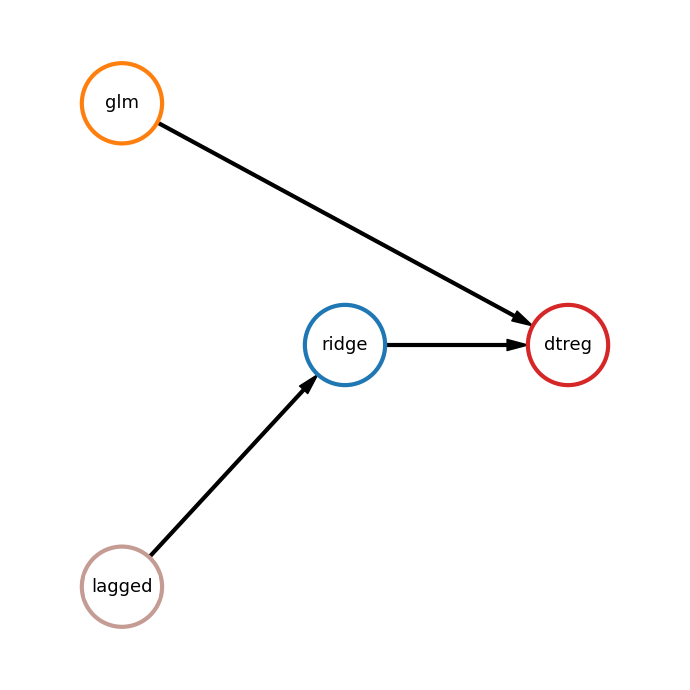

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:07:08,600 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 8}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.8141806068499005}
lagged - {'window_size': 8.591334111601896} 
Initial metric: 274.061


2022-12-01 17:07:09,275 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 8}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.8141806068499005}
lagged - {'window_size': 8.591334111601896} 
Initial metric: 274.061
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005090 seconds


2022-12-01 17:07:09,300 - build_posterior_wrapper took 0.005090 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:07:09,307 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007582 seconds


2022-12-01 17:07:09,977 - build_posterior_wrapper took 0.007582 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 274.061242


2022-12-01 17:07:09,983 - TPE using 1/1 trials with best loss 274.061242
 20%|██        | 2/10 [00:00<00:07,  1.01trial/s, best loss: 255.7133857471984]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005666 seconds


2022-12-01 17:07:10,962 - build_posterior_wrapper took 0.005666 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 255.713386


2022-12-01 17:07:10,970 - TPE using 2/2 trials with best loss 255.713386
 30%|███       | 3/10 [00:01<00:06,  1.07trial/s, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006794 seconds


2022-12-01 17:07:11,855 - build_posterior_wrapper took 0.006794 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 232.879209


2022-12-01 17:07:11,872 - TPE using 3/3 trials with best loss 232.879209
 40%|████      | 4/10 [00:02<00:05,  1.04trial/s, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005980 seconds


2022-12-01 17:07:12,860 - build_posterior_wrapper took 0.005980 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 232.879209


2022-12-01 17:07:12,876 - TPE using 4/4 trials with best loss 232.879209
 50%|█████     | 5/10 [00:03<00:04,  1.04trial/s, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005801 seconds


2022-12-01 17:07:13,818 - build_posterior_wrapper took 0.005801 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 232.879209


2022-12-01 17:07:13,829 - TPE using 5/5 trials with best loss 232.879209
 60%|██████    | 6/10 [00:04<00:03,  1.09trial/s, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007069 seconds


2022-12-01 17:07:14,649 - build_posterior_wrapper took 0.007069 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 232.879209


2022-12-01 17:07:14,661 - TPE using 6/6 trials with best loss 232.879209
 70%|███████   | 7/10 [00:06<00:04,  1.40s/trial, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005825 seconds


2022-12-01 17:07:16,976 - build_posterior_wrapper took 0.005825 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 232.879209


2022-12-01 17:07:16,987 - TPE using 7/7 trials with best loss 232.879209
 80%|████████  | 8/10 [00:07<00:02,  1.23s/trial, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006455 seconds


2022-12-01 17:07:17,851 - build_posterior_wrapper took 0.006455 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 232.879209


2022-12-01 17:07:17,863 - TPE using 8/8 trials with best loss 232.879209
 90%|█████████ | 9/10 [00:08<00:01,  1.09s/trial, best loss: 232.87920941564786]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006014 seconds


2022-12-01 17:07:18,637 - build_posterior_wrapper took 0.006014 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 232.879209


2022-12-01 17:07:18,655 - TPE using 9/9 trials with best loss 232.879209
100%|██████████| 10/10 [00:09<00:00,  1.03s/trial, best loss: 232.87920941564786]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:07:20,072 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 232.879 equal or better than initial (+ 5% deviation) 287.764


2022-12-01 17:07:20,084 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 232.879 equal or better than initial (+ 5% deviation) 287.764


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 17}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 9.617884327156201}
lagged - {'window_size': 149}


2022-12-01 17:07:20,092 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 17}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 9.617884327156201}
lagged - {'window_size': 149}


CRITICAL:root:PipelineTuner - Final metric: 232.879


2022-12-01 17:07:20,105 - PipelineTuner - Final metric: 232.879


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:07:21,091 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 17}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 9.617884327156201}
lagged - {'window_size': 149} 
Initial metric: 26.290


2022-12-01 17:07:22,431 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 17}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 9.617884327156201}
lagged - {'window_size': 149} 
Initial metric: 26.290
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009356 seconds


2022-12-01 17:07:22,467 - build_posterior_wrapper took 0.009356 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:07:22,472 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008985 seconds


2022-12-01 17:07:23,858 - build_posterior_wrapper took 0.008985 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 26.289812


2022-12-01 17:07:23,868 - TPE using 1/1 trials with best loss 26.289812
 20%|██        | 2/10 [00:02<00:20,  2.56s/trial, best loss: 26.289811743880676]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006350 seconds


2022-12-01 17:07:26,422 - build_posterior_wrapper took 0.006350 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 26.289812


2022-12-01 17:07:26,433 - TPE using 2/2 trials with best loss 26.289812
 30%|███       | 3/10 [00:04<00:14,  2.02s/trial, best loss: 26.289811743880676]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006110 seconds


2022-12-01 17:07:28,066 - build_posterior_wrapper took 0.006110 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 26.289812


2022-12-01 17:07:28,076 - TPE using 3/3 trials with best loss 26.289812
 40%|████      | 4/10 [00:05<00:10,  1.76s/trial, best loss: 25.43905140383571] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005934 seconds


2022-12-01 17:07:29,509 - build_posterior_wrapper took 0.005934 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 25.439051


2022-12-01 17:07:29,526 - TPE using 4/4 trials with best loss 25.439051
 50%|█████     | 5/10 [00:06<00:07,  1.47s/trial, best loss: 25.43905140383571]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006204 seconds


2022-12-01 17:07:30,549 - build_posterior_wrapper took 0.006204 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 25.439051


2022-12-01 17:07:30,557 - TPE using 5/5 trials with best loss 25.439051
 60%|██████    | 6/10 [00:08<00:06,  1.69s/trial, best loss: 25.43905140383571]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007752 seconds


2022-12-01 17:07:32,622 - build_posterior_wrapper took 0.007752 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 25.439051


2022-12-01 17:07:32,635 - TPE using 6/6 trials with best loss 25.439051
 70%|███████   | 7/10 [00:09<00:04,  1.46s/trial, best loss: 25.43905140383571]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006918 seconds


2022-12-01 17:07:33,637 - build_posterior_wrapper took 0.006918 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 25.439051


2022-12-01 17:07:33,656 - TPE using 7/7 trials with best loss 25.439051
 80%|████████  | 8/10 [00:11<00:02,  1.38s/trial, best loss: 25.43905140383571]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005841 seconds


2022-12-01 17:07:34,867 - build_posterior_wrapper took 0.005841 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 25.439051


2022-12-01 17:07:34,875 - TPE using 8/8 trials with best loss 25.439051
 90%|█████████ | 9/10 [00:12<00:01,  1.30s/trial, best loss: 25.43905140383571]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006007 seconds


2022-12-01 17:07:35,989 - build_posterior_wrapper took 0.006007 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 25.439051


2022-12-01 17:07:36,008 - TPE using 9/9 trials with best loss 25.439051
100%|██████████| 10/10 [00:13<00:00,  1.47s/trial, best loss: 25.43905140383571]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:07:38,825 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 25.439 equal or better than initial (+ 5% deviation) 27.604


2022-12-01 17:07:38,829 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 25.439 equal or better than initial (+ 5% deviation) 27.604


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 7}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 7.811572472238834}
lagged - {'window_size': 347}


2022-12-01 17:07:38,846 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 7}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 7.811572472238834}
lagged - {'window_size': 347}


CRITICAL:root:PipelineTuner - Final metric: 25.439


2022-12-01 17:07:38,857 - PipelineTuner - Final metric: 25.439
Fitting pipeline №3


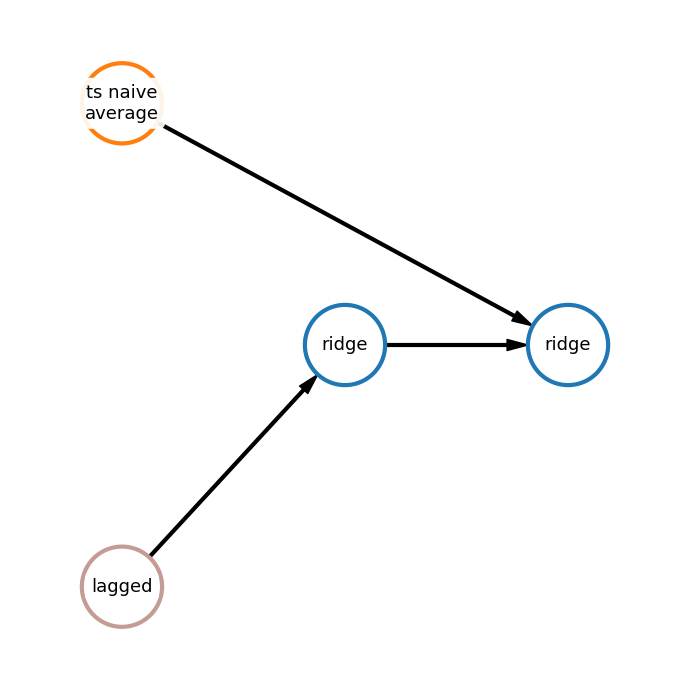

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:07:40,878 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 204.104


2022-12-01 17:07:41,252 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 204.104
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002339 seconds


2022-12-01 17:07:41,267 - build_posterior_wrapper took 0.002339 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:07:41,289 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002627 seconds


2022-12-01 17:07:41,741 - build_posterior_wrapper took 0.002627 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 204.104350


2022-12-01 17:07:41,750 - TPE using 1/1 trials with best loss 204.104350
 20%|██        | 2/10 [00:02<00:18,  2.29s/trial, best loss: 182.57253075084193]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009208 seconds


2022-12-01 17:07:44,040 - build_posterior_wrapper took 0.009208 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 182.572531


2022-12-01 17:07:44,046 - TPE using 2/2 trials with best loss 182.572531
 30%|███       | 3/10 [00:02<00:08,  1.26s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002328 seconds


2022-12-01 17:07:44,578 - build_posterior_wrapper took 0.002328 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 173.034685


2022-12-01 17:07:44,594 - TPE using 3/3 trials with best loss 173.034685
 40%|████      | 4/10 [00:04<00:08,  1.39s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002287 seconds


2022-12-01 17:07:46,124 - build_posterior_wrapper took 0.002287 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 173.034685


2022-12-01 17:07:46,141 - TPE using 4/4 trials with best loss 173.034685
 50%|█████     | 5/10 [00:04<00:05,  1.06s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002432 seconds


2022-12-01 17:07:46,678 - build_posterior_wrapper took 0.002432 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 173.034685


2022-12-01 17:07:46,692 - TPE using 5/5 trials with best loss 173.034685
 60%|██████    | 6/10 [00:07<00:05,  1.46s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002282 seconds


2022-12-01 17:07:48,852 - build_posterior_wrapper took 0.002282 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 173.034685


2022-12-01 17:07:48,869 - TPE using 6/6 trials with best loss 173.034685
 70%|███████   | 7/10 [00:08<00:04,  1.45s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009246 seconds


2022-12-01 17:07:50,283 - build_posterior_wrapper took 0.009246 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 173.034685


2022-12-01 17:07:50,300 - TPE using 7/7 trials with best loss 173.034685
 80%|████████  | 8/10 [00:11<00:03,  1.92s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003266 seconds


2022-12-01 17:07:53,174 - build_posterior_wrapper took 0.003266 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 173.034685


2022-12-01 17:07:53,183 - TPE using 8/8 trials with best loss 173.034685
 90%|█████████ | 9/10 [00:11<00:01,  1.45s/trial, best loss: 173.03468529535763]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002340 seconds


2022-12-01 17:07:53,618 - build_posterior_wrapper took 0.002340 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 173.034685


2022-12-01 17:07:53,636 - TPE using 9/9 trials with best loss 173.034685
100%|██████████| 10/10 [00:12<00:00,  1.42s/trial, best loss: 173.03468529535763]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:07:55,065 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 173.035 equal or better than initial (+ 5% deviation) 214.309


2022-12-01 17:07:55,078 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 173.035 equal or better than initial (+ 5% deviation) 214.309


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44}


2022-12-01 17:07:55,088 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44}


CRITICAL:root:PipelineTuner - Final metric: 173.035


2022-12-01 17:07:55,098 - PipelineTuner - Final metric: 173.035


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:07:55,614 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44} 
Initial metric: 19.226


2022-12-01 17:07:56,094 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44} 
Initial metric: 19.226
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002691 seconds


2022-12-01 17:07:56,112 - build_posterior_wrapper took 0.002691 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:07:56,119 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003073 seconds


2022-12-01 17:07:56,611 - build_posterior_wrapper took 0.003073 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 19.226076


2022-12-01 17:07:56,624 - TPE using 1/1 trials with best loss 19.226076
 20%|██        | 2/10 [00:00<00:04,  1.70trial/s, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002296 seconds


2022-12-01 17:07:57,198 - build_posterior_wrapper took 0.002296 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 19.226076


2022-12-01 17:07:57,210 - TPE using 2/2 trials with best loss 19.226076
 30%|███       | 3/10 [00:02<00:07,  1.11s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002563 seconds


2022-12-01 17:07:58,677 - build_posterior_wrapper took 0.002563 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 19.226076


2022-12-01 17:07:58,692 - TPE using 3/3 trials with best loss 19.226076
 40%|████      | 4/10 [00:03<00:07,  1.20s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002562 seconds


2022-12-01 17:07:59,989 - build_posterior_wrapper took 0.002562 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 19.226076


2022-12-01 17:08:00,008 - TPE using 4/4 trials with best loss 19.226076
 50%|█████     | 5/10 [00:05<00:08,  1.62s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010133 seconds


2022-12-01 17:08:02,242 - build_posterior_wrapper took 0.010133 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 19.226076


2022-12-01 17:08:02,257 - TPE using 5/5 trials with best loss 19.226076
 60%|██████    | 6/10 [00:06<00:05,  1.46s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003390 seconds


2022-12-01 17:08:03,407 - build_posterior_wrapper took 0.003390 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 19.226076


2022-12-01 17:08:03,413 - TPE using 6/6 trials with best loss 19.226076
 70%|███████   | 7/10 [00:08<00:04,  1.38s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003624 seconds


2022-12-01 17:08:04,633 - build_posterior_wrapper took 0.003624 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 19.226076


2022-12-01 17:08:04,641 - TPE using 7/7 trials with best loss 19.226076
 80%|████████  | 8/10 [00:10<00:03,  1.85s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002660 seconds


2022-12-01 17:08:07,465 - build_posterior_wrapper took 0.002660 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 19.226076


2022-12-01 17:08:07,485 - TPE using 8/8 trials with best loss 19.226076
 90%|█████████ | 9/10 [00:11<00:01,  1.59s/trial, best loss: 19.22607614392863]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003322 seconds


2022-12-01 17:08:08,483 - build_posterior_wrapper took 0.003322 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 19.226076


2022-12-01 17:08:08,489 - TPE using 9/9 trials with best loss 19.226076
100%|██████████| 10/10 [00:14<00:00,  1.57s/trial, best loss: 19.22607614392863]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:08:11,204 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.226 equal or better than initial (+ 5% deviation) 20.187


2022-12-01 17:08:11,210 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.226 equal or better than initial (+ 5% deviation) 20.187


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44}


2022-12-01 17:08:11,220 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 5.162272720026224}
ts_naive_average - {'part_for_averaging': 0.5711650353057466}
ridge - {'alpha': 6.688539285190588}
lagged - {'window_size': 44}


CRITICAL:root:PipelineTuner - Final metric: 19.226


2022-12-01 17:08:11,230 - PipelineTuner - Final metric: 19.226
Fitting pipeline №4


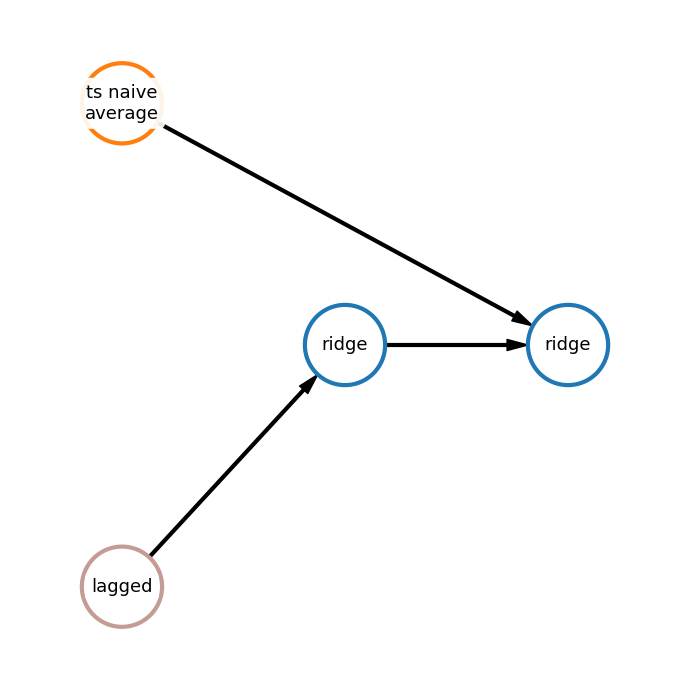

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:08:12,095 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10.94701125541765} 
Initial metric: 201.109


2022-12-01 17:08:12,503 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
ridge - {}
lagged - {'window_size': 10.94701125541765} 
Initial metric: 201.109
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003102 seconds


2022-12-01 17:08:12,522 - build_posterior_wrapper took 0.003102 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:08:12,530 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002323 seconds


2022-12-01 17:08:13,009 - build_posterior_wrapper took 0.002323 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 201.108955


2022-12-01 17:08:13,020 - TPE using 1/1 trials with best loss 201.108955
 20%|██        | 2/10 [00:02<00:16,  2.03s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002314 seconds


2022-12-01 17:08:15,046 - build_posterior_wrapper took 0.002314 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 182.546819


2022-12-01 17:08:15,059 - TPE using 2/2 trials with best loss 182.546819
 30%|███       | 3/10 [00:02<00:08,  1.19s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002348 seconds


2022-12-01 17:08:15,643 - build_posterior_wrapper took 0.002348 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 182.546819


2022-12-01 17:08:15,653 - TPE using 3/3 trials with best loss 182.546819
 40%|████      | 4/10 [00:04<00:08,  1.35s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002294 seconds


2022-12-01 17:08:17,190 - build_posterior_wrapper took 0.002294 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 182.546819


2022-12-01 17:08:17,199 - TPE using 4/4 trials with best loss 182.546819
 50%|█████     | 5/10 [00:05<00:07,  1.53s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002650 seconds


2022-12-01 17:08:19,001 - build_posterior_wrapper took 0.002650 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 182.546819


2022-12-01 17:08:19,012 - TPE using 5/5 trials with best loss 182.546819
 60%|██████    | 6/10 [00:08<00:07,  1.76s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002336 seconds


2022-12-01 17:08:21,166 - build_posterior_wrapper took 0.002336 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 182.546819


2022-12-01 17:08:21,178 - TPE using 6/6 trials with best loss 182.546819
 70%|███████   | 7/10 [00:08<00:03,  1.33s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002308 seconds


2022-12-01 17:08:21,662 - build_posterior_wrapper took 0.002308 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 182.546819


2022-12-01 17:08:21,673 - TPE using 7/7 trials with best loss 182.546819
 80%|████████  | 8/10 [00:09<00:02,  1.15s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002709 seconds


2022-12-01 17:08:22,434 - build_posterior_wrapper took 0.002709 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 182.546819


2022-12-01 17:08:22,444 - TPE using 8/8 trials with best loss 182.546819
 90%|█████████ | 9/10 [00:10<00:01,  1.25s/trial, best loss: 182.5468192752917]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002428 seconds


2022-12-01 17:08:23,917 - build_posterior_wrapper took 0.002428 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 182.546819


2022-12-01 17:08:23,927 - TPE using 9/9 trials with best loss 182.546819
100%|██████████| 10/10 [00:11<00:00,  1.32s/trial, best loss: 182.5468192752917]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:08:26,894 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 182.547 equal or better than initial (+ 5% deviation) 211.164


2022-12-01 17:08:26,898 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 182.547 equal or better than initial (+ 5% deviation) 211.164


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.9157311029410775}
ts_naive_average - {'part_for_averaging': 0.8005623096256954}
ridge - {'alpha': 2.1421168756041915}
lagged - {'window_size': 423}


2022-12-01 17:08:26,910 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.9157311029410775}
ts_naive_average - {'part_for_averaging': 0.8005623096256954}
ridge - {'alpha': 2.1421168756041915}
lagged - {'window_size': 423}


CRITICAL:root:PipelineTuner - Final metric: 182.547


2022-12-01 17:08:26,919 - PipelineTuner - Final metric: 182.547


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:08:29,069 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.9157311029410775}
ts_naive_average - {'part_for_averaging': 0.8005623096256954}
ridge - {'alpha': 2.1421168756041915}
lagged - {'window_size': 423} 
Initial metric: 20.283


2022-12-01 17:08:31,190 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.9157311029410775}
ts_naive_average - {'part_for_averaging': 0.8005623096256954}
ridge - {'alpha': 2.1421168756041915}
lagged - {'window_size': 423} 
Initial metric: 20.283
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002335 seconds


2022-12-01 17:08:31,212 - build_posterior_wrapper took 0.002335 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:08:31,219 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003932 seconds


2022-12-01 17:08:33,254 - build_posterior_wrapper took 0.003932 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 20.282980


2022-12-01 17:08:33,269 - TPE using 1/1 trials with best loss 20.282980
 20%|██        | 2/10 [00:01<00:08,  1.07s/trial, best loss: 20.28297991947686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007049 seconds


2022-12-01 17:08:34,329 - build_posterior_wrapper took 0.007049 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 20.282980


2022-12-01 17:08:34,334 - TPE using 2/2 trials with best loss 20.282980
 30%|███       | 3/10 [00:01<00:06,  1.03trial/s, best loss: 20.28297991947686]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002356 seconds


2022-12-01 17:08:35,223 - build_posterior_wrapper took 0.002356 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 20.282980


2022-12-01 17:08:35,239 - TPE using 3/3 trials with best loss 20.282980
 40%|████      | 4/10 [00:02<00:04,  1.34trial/s, best loss: 20.16040467941492]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002278 seconds


2022-12-01 17:08:35,701 - build_posterior_wrapper took 0.002278 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 20.160405


2022-12-01 17:08:35,713 - TPE using 4/4 trials with best loss 20.160405
 50%|█████     | 5/10 [00:03<00:03,  1.49trial/s, best loss: 19.637368010747814]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006582 seconds


2022-12-01 17:08:36,272 - build_posterior_wrapper took 0.006582 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 19.637368


2022-12-01 17:08:36,291 - TPE using 5/5 trials with best loss 19.637368
 60%|██████    | 6/10 [00:04<00:04,  1.04s/trial, best loss: 19.637368010747814]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003024 seconds


2022-12-01 17:08:37,966 - build_posterior_wrapper took 0.003024 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 19.637368


2022-12-01 17:08:37,978 - TPE using 6/6 trials with best loss 19.637368
 70%|███████   | 7/10 [00:07<00:04,  1.53s/trial, best loss: 19.623394601443525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010650 seconds


2022-12-01 17:08:40,456 - build_posterior_wrapper took 0.010650 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 19.623395


2022-12-01 17:08:40,467 - TPE using 7/7 trials with best loss 19.623395
 80%|████████  | 8/10 [00:08<00:02,  1.42s/trial, best loss: 19.623394601443525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002441 seconds


2022-12-01 17:08:41,623 - build_posterior_wrapper took 0.002441 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 19.623395


2022-12-01 17:08:41,637 - TPE using 8/8 trials with best loss 19.623395
 90%|█████████ | 9/10 [00:09<00:01,  1.20s/trial, best loss: 19.623394601443525]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005989 seconds


2022-12-01 17:08:42,358 - build_posterior_wrapper took 0.005989 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 19.623395


2022-12-01 17:08:42,369 - TPE using 9/9 trials with best loss 19.623395
100%|██████████| 10/10 [00:11<00:00,  1.26s/trial, best loss: 19.623394601443525]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:08:46,940 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.623 equal or better than initial (+ 5% deviation) 21.297


2022-12-01 17:08:46,953 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.623 equal or better than initial (+ 5% deviation) 21.297


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.394195431616884}
ts_naive_average - {'part_for_averaging': 0.9591402942036071}
ridge - {'alpha': 4.414488385691214}
lagged - {'window_size': 482}


2022-12-01 17:08:46,962 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, ts_naive_average, ridge, lagged]}
ridge - {'alpha': 3.394195431616884}
ts_naive_average - {'part_for_averaging': 0.9591402942036071}
ridge - {'alpha': 4.414488385691214}
lagged - {'window_size': 482}


CRITICAL:root:PipelineTuner - Final metric: 19.623


2022-12-01 17:08:46,970 - PipelineTuner - Final metric: 19.623
Fitting pipeline №5


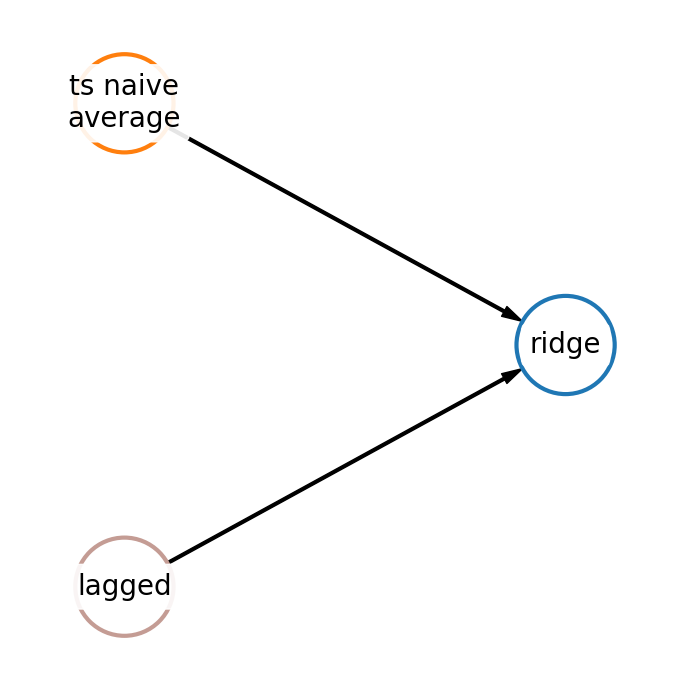

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:08:50,177 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
lagged - {'window_size': 10} 
Initial metric: 204.104


2022-12-01 17:08:50,507 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {}
ts_naive_average - {'part_for_averaging': 1.0}
lagged - {'window_size': 10} 
Initial metric: 204.104
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007055 seconds


2022-12-01 17:08:50,536 - build_posterior_wrapper took 0.007055 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:08:50,552 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002893 seconds


2022-12-01 17:08:50,958 - build_posterior_wrapper took 0.002893 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 204.106625


2022-12-01 17:08:50,966 - TPE using 1/1 trials with best loss 204.106625
 20%|██        | 2/10 [00:01<00:14,  1.85s/trial, best loss: 204.10662477833898]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003411 seconds


2022-12-01 17:08:52,816 - build_posterior_wrapper took 0.003411 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 204.106625


2022-12-01 17:08:52,830 - TPE using 2/2 trials with best loss 204.106625
 30%|███       | 3/10 [00:03<00:10,  1.46s/trial, best loss: 204.10662477833898]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003329 seconds


2022-12-01 17:08:53,996 - build_posterior_wrapper took 0.003329 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 204.106625


2022-12-01 17:08:54,003 - TPE using 3/3 trials with best loss 204.106625
 40%|████      | 4/10 [00:03<00:06,  1.08s/trial, best loss: 204.10662477833898]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012251 seconds


2022-12-01 17:08:54,637 - build_posterior_wrapper took 0.012251 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 204.106625


2022-12-01 17:08:54,649 - TPE using 4/4 trials with best loss 204.106625
 50%|█████     | 5/10 [00:04<00:04,  1.05trial/s, best loss: 204.10662477833898]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002953 seconds


2022-12-01 17:08:55,391 - build_posterior_wrapper took 0.002953 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 204.106625


2022-12-01 17:08:55,397 - TPE using 5/5 trials with best loss 204.106625
 60%|██████    | 6/10 [00:06<00:05,  1.46s/trial, best loss: 176.8736719745405] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001713 seconds


2022-12-01 17:08:57,749 - build_posterior_wrapper took 0.001713 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 176.873672


2022-12-01 17:08:57,773 - TPE using 6/6 trials with best loss 176.873672
 70%|███████   | 7/10 [00:09<00:05,  1.73s/trial, best loss: 176.8736719745405]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001672 seconds


2022-12-01 17:08:59,988 - build_posterior_wrapper took 0.001672 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 176.873672


2022-12-01 17:09:00,007 - TPE using 7/7 trials with best loss 176.873672
 80%|████████  | 8/10 [00:11<00:03,  1.85s/trial, best loss: 176.8736719745405]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006397 seconds


2022-12-01 17:09:02,113 - build_posterior_wrapper took 0.006397 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 176.873672


2022-12-01 17:09:02,123 - TPE using 8/8 trials with best loss 176.873672
 90%|█████████ | 9/10 [00:12<00:01,  1.54s/trial, best loss: 176.8736719745405]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004665 seconds


2022-12-01 17:09:02,984 - build_posterior_wrapper took 0.004665 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 176.873672


2022-12-01 17:09:02,992 - TPE using 9/9 trials with best loss 176.873672
100%|██████████| 10/10 [00:12<00:00,  1.42s/trial, best loss: 176.8736719745405]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:09:06,336 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 176.874 equal or better than initial (+ 5% deviation) 214.309


2022-12-01 17:09:06,351 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 176.874 equal or better than initial (+ 5% deviation) 214.309


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481}


2022-12-01 17:09:06,364 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481}


CRITICAL:root:PipelineTuner - Final metric: 176.874


2022-12-01 17:09:06,379 - PipelineTuner - Final metric: 176.874


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:09:08,844 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481} 
Initial metric: 19.653


2022-12-01 17:09:11,247 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481} 
Initial metric: 19.653
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001955 seconds


2022-12-01 17:09:11,267 - build_posterior_wrapper took 0.001955 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:09:11,273 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002032 seconds


2022-12-01 17:09:13,740 - build_posterior_wrapper took 0.002032 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 19.652630


2022-12-01 17:09:13,755 - TPE using 1/1 trials with best loss 19.652630
 20%|██        | 2/10 [00:00<00:03,  2.14trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001782 seconds


2022-12-01 17:09:14,212 - build_posterior_wrapper took 0.001782 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 19.652630


2022-12-01 17:09:14,228 - TPE using 2/2 trials with best loss 19.652630
 30%|███       | 3/10 [00:01<00:04,  1.57trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002048 seconds


2022-12-01 17:09:14,966 - build_posterior_wrapper took 0.002048 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 19.652630


2022-12-01 17:09:14,982 - TPE using 3/3 trials with best loss 19.652630
 40%|████      | 4/10 [00:02<00:06,  1.01s/trial, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001755 seconds


2022-12-01 17:09:16,422 - build_posterior_wrapper took 0.001755 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 19.652630


2022-12-01 17:09:16,438 - TPE using 4/4 trials with best loss 19.652630
 50%|█████     | 5/10 [00:03<00:03,  1.29trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004488 seconds


2022-12-01 17:09:16,844 - build_posterior_wrapper took 0.004488 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 19.652630


2022-12-01 17:09:16,855 - TPE using 5/5 trials with best loss 19.652630
 60%|██████    | 6/10 [00:03<00:02,  1.48trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001719 seconds


2022-12-01 17:09:17,340 - build_posterior_wrapper took 0.001719 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 19.652630


2022-12-01 17:09:17,358 - TPE using 6/6 trials with best loss 19.652630
 70%|███████   | 7/10 [00:04<00:01,  1.68trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006835 seconds


2022-12-01 17:09:17,781 - build_posterior_wrapper took 0.006835 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 19.652630


2022-12-01 17:09:17,785 - TPE using 7/7 trials with best loss 19.652630
 80%|████████  | 8/10 [00:04<00:01,  1.88trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006512 seconds


2022-12-01 17:09:18,192 - build_posterior_wrapper took 0.006512 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 19.652630


2022-12-01 17:09:18,212 - TPE using 8/8 trials with best loss 19.652630
 90%|█████████ | 9/10 [00:05<00:00,  1.83trial/s, best loss: 19.652630219393387]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001714 seconds


2022-12-01 17:09:18,754 - build_posterior_wrapper took 0.001714 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 19.652630


2022-12-01 17:09:18,769 - TPE using 9/9 trials with best loss 19.652630
100%|██████████| 10/10 [00:06<00:00,  1.39trial/s, best loss: 19.652630219393387]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:09:22,589 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.653 equal or better than initial (+ 5% deviation) 20.635


2022-12-01 17:09:22,601 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 19.653 equal or better than initial (+ 5% deviation) 20.635


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481}


2022-12-01 17:09:22,611 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [ridge, ts_naive_average, lagged]}
ridge - {'alpha': 5.478592560535141}
ts_naive_average - {'part_for_averaging': 0.38899212461322286}
lagged - {'window_size': 481}


CRITICAL:root:PipelineTuner - Final metric: 19.653


2022-12-01 17:09:22,628 - PipelineTuner - Final metric: 19.653
Fitting pipeline №6


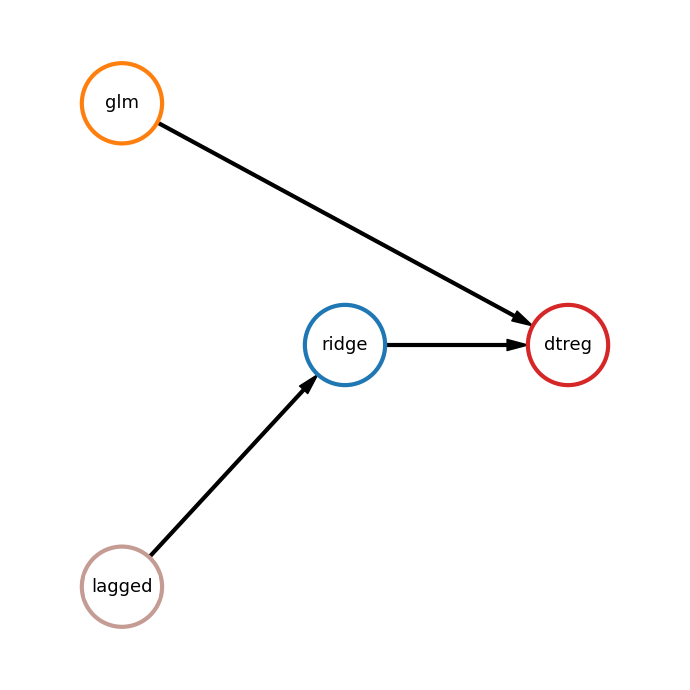

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:09:25,501 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 8}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.8141806068499005}
lagged - {'window_size': 8.591334111601896} 
Initial metric: 274.061


2022-12-01 17:09:26,128 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 8}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 4.8141806068499005}
lagged - {'window_size': 8.591334111601896} 
Initial metric: 274.061
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005730 seconds


2022-12-01 17:09:26,158 - build_posterior_wrapper took 0.005730 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:09:26,166 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004785 seconds


2022-12-01 17:09:26,820 - build_posterior_wrapper took 0.004785 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 274.061242


2022-12-01 17:09:26,830 - TPE using 1/1 trials with best loss 274.061242
 20%|██        | 2/10 [00:00<00:04,  1.60trial/s, best loss: 274.06124210765194]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006150 seconds


2022-12-01 17:09:27,448 - build_posterior_wrapper took 0.006150 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 274.061242


2022-12-01 17:09:27,457 - TPE using 2/2 trials with best loss 274.061242
 30%|███       | 3/10 [00:02<00:10,  1.52s/trial, best loss: 237.752889250953]  

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007134 seconds


2022-12-01 17:09:29,593 - build_posterior_wrapper took 0.007134 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 237.752889


2022-12-01 17:09:29,600 - TPE using 3/3 trials with best loss 237.752889
 40%|████      | 4/10 [00:03<00:06,  1.13s/trial, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008315 seconds


2022-12-01 17:09:30,268 - build_posterior_wrapper took 0.008315 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 237.752889


2022-12-01 17:09:30,275 - TPE using 4/4 trials with best loss 237.752889
 50%|█████     | 5/10 [00:05<00:07,  1.43s/trial, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005316 seconds


2022-12-01 17:09:32,148 - build_posterior_wrapper took 0.005316 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 237.752889


2022-12-01 17:09:32,161 - TPE using 5/5 trials with best loss 237.752889
 60%|██████    | 6/10 [00:06<00:05,  1.36s/trial, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007597 seconds


2022-12-01 17:09:33,385 - build_posterior_wrapper took 0.007597 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 237.752889


2022-12-01 17:09:33,399 - TPE using 6/6 trials with best loss 237.752889
 70%|███████   | 7/10 [00:07<00:03,  1.18s/trial, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006916 seconds


2022-12-01 17:09:34,234 - build_posterior_wrapper took 0.006916 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 237.752889


2022-12-01 17:09:34,245 - TPE using 7/7 trials with best loss 237.752889
 80%|████████  | 8/10 [00:08<00:02,  1.05s/trial, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005668 seconds


2022-12-01 17:09:34,999 - build_posterior_wrapper took 0.005668 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 237.752889


2022-12-01 17:09:35,011 - TPE using 8/8 trials with best loss 237.752889
 90%|█████████ | 9/10 [00:08<00:00,  1.05trial/s, best loss: 237.752889250953]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003357 seconds


2022-12-01 17:09:35,735 - build_posterior_wrapper took 0.003357 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 237.752889


2022-12-01 17:09:35,746 - TPE using 9/9 trials with best loss 237.752889
100%|██████████| 10/10 [00:11<00:00,  1.24s/trial, best loss: 222.85676998581857]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:09:40,049 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 222.857 equal or better than initial (+ 5% deviation) 287.764


2022-12-01 17:09:40,053 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 222.857 equal or better than initial (+ 5% deviation) 287.764


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 10}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 6.6020122419981115}
lagged - {'window_size': 419}


2022-12-01 17:09:40,065 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 10}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 6.6020122419981115}
lagged - {'window_size': 419}


CRITICAL:root:PipelineTuner - Final metric: 222.857


2022-12-01 17:09:40,078 - PipelineTuner - Final metric: 222.857


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-12-01 17:09:42,023 - PipelineTuner - Hyperparameters optimization start


CRITICAL:root:PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 10}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 6.6020122419981115}
lagged - {'window_size': 419} 
Initial metric: 40.199


2022-12-01 17:09:44,060 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 10}
glm - {'family': 'gamma', 'link': 'inverse_power'}
ridge - {'alpha': 6.6020122419981115}
lagged - {'window_size': 419} 
Initial metric: 40.199
  0%|          | 0/1 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009117 seconds


2022-12-01 17:09:44,097 - build_posterior_wrapper took 0.009117 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-12-01 17:09:44,105 - TPE using 0 trials
 10%|█         | 1/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005613 seconds


2022-12-01 17:09:46,352 - build_posterior_wrapper took 0.005613 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 40.198687


2022-12-01 17:09:46,365 - TPE using 1/1 trials with best loss 40.198687
 20%|██        | 2/10 [00:00<00:05,  1.37trial/s, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006240 seconds


2022-12-01 17:09:47,087 - build_posterior_wrapper took 0.006240 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 26.709977


2022-12-01 17:09:47,095 - TPE using 2/2 trials with best loss 26.709977
 30%|███       | 3/10 [00:02<00:09,  1.37s/trial, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005703 seconds


2022-12-01 17:09:48,896 - build_posterior_wrapper took 0.005703 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 26.709977


2022-12-01 17:09:48,908 - TPE using 3/3 trials with best loss 26.709977
 40%|████      | 4/10 [00:03<00:06,  1.10s/trial, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016242 seconds


2022-12-01 17:09:49,694 - build_posterior_wrapper took 0.016242 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 26.709977


2022-12-01 17:09:49,701 - TPE using 4/4 trials with best loss 26.709977
 50%|█████     | 5/10 [00:04<00:04,  1.04trial/s, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005793 seconds


2022-12-01 17:09:50,430 - build_posterior_wrapper took 0.005793 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 26.709977


2022-12-01 17:09:50,438 - TPE using 5/5 trials with best loss 26.709977
 60%|██████    | 6/10 [00:04<00:03,  1.14trial/s, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003838 seconds


2022-12-01 17:09:51,158 - build_posterior_wrapper took 0.003838 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 26.709977


2022-12-01 17:09:51,164 - TPE using 6/6 trials with best loss 26.709977
 70%|███████   | 7/10 [00:06<00:03,  1.16s/trial, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007692 seconds


2022-12-01 17:09:52,866 - build_posterior_wrapper took 0.007692 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 26.709977


2022-12-01 17:09:52,872 - TPE using 7/7 trials with best loss 26.709977
 80%|████████  | 8/10 [00:08<00:02,  1.47s/trial, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008065 seconds


2022-12-01 17:09:54,976 - build_posterior_wrapper took 0.008065 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 26.709977


2022-12-01 17:09:54,982 - TPE using 8/8 trials with best loss 26.709977
 90%|█████████ | 9/10 [00:09<00:01,  1.31s/trial, best loss: 26.709976963426712]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005984 seconds


2022-12-01 17:09:55,937 - build_posterior_wrapper took 0.005984 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 26.709977


2022-12-01 17:09:55,943 - TPE using 9/9 trials with best loss 26.709977
100%|██████████| 10/10 [00:10<00:00,  1.20s/trial, best loss: 26.709976963426712]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-12-01 17:09:57,853 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 26.710 equal or better than initial (+ 5% deviation) 42.209


2022-12-01 17:09:57,861 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 26.710 equal or better than initial (+ 5% deviation) 42.209


CRITICAL:root:PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 8}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 7.672792036112603}
lagged - {'window_size': 80}


2022-12-01 17:09:57,869 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [dtreg, glm, ridge, lagged]}
dtreg - {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 8}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
ridge - {'alpha': 7.672792036112603}
lagged - {'window_size': 80}


CRITICAL:root:PipelineTuner - Final metric: 26.710


2022-12-01 17:09:57,877 - PipelineTuner - Final metric: 26.710


In [77]:
x = conf_int_maker(model = model, number_models =5,pipelines_show = True)

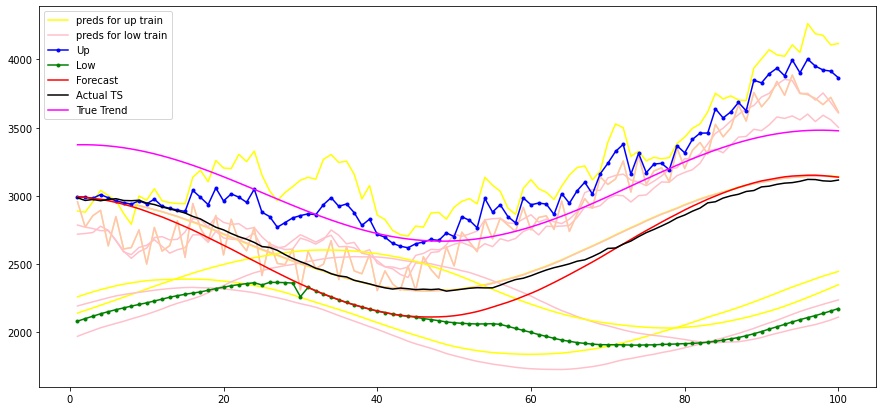

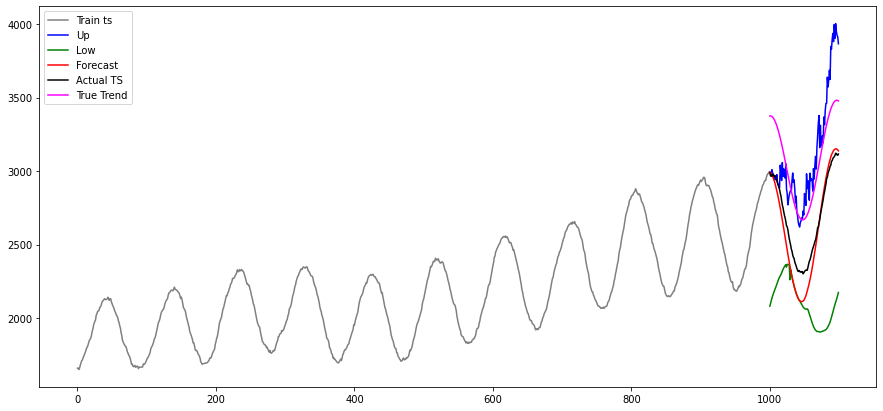

In [79]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)